# **Classification du churn dans une entreprise de service numérique**

L'objectif est de prédire la résiliation des clients d'une entreprise de services téléphoniques et Internet à l'aide d'un modèle de Machine Learning.

- `CustomerID` : Un identifiant unique pour chaque client.
- `Zip Code` : Le code postal de la résidence principale du client.
- `Gender` : Le genre du client : Masculin, Féminin.
- `Senior Citizen` : Indique si le client a 65 ans ou plus : Oui, Non.
- `Partner` : Indique si le client a un partenaire : Oui, Non.
- `Dependents` : Indique si le client vit avec des personnes à charge : Oui, Non. Les personnes à charge peuvent être des enfants, parents, grands-parents, etc.
- `Tenure Months` : Indique le nombre total de mois que le client a passé avec l'entreprise à la fin du trimestre d'étude.
- `Phone Service` : Indique si le client est abonné à un service de téléphone à domicile avec l'entreprise : Oui, Non.
- `Multiple Lines` : Indique si le client est abonné à plusieurs lignes téléphoniques avec l'entreprise : Oui, Non.
- `Internet Service` : Indique si le client est abonné à un service Internet avec l'entreprise : Non, DSL, Fibre optique.
- `Online Security` : Indique si le client est abonné à un service supplémentaire de sécurité en ligne fourni par l'entreprise : Oui, Non.
- `Online Backup` : Indique si le client est abonné à un service supplémentaire de sauvegarde en ligne fourni par l'entreprise : Oui, Non.
- `Device Protection` : Indique si le client est abonné à un plan de protection supplémentaire pour son équipement Internet fourni par l'entreprise : Oui, Non.
- `Tech Support` : Indique si le client est abonné à un plan de support technique supplémentaire avec des temps d'attente réduits : Oui, Non.
- `Streaming TV` : Indique si le client utilise son service Internet pour diffuser des programmes télévisés via un fournisseur tiers : Oui, Non. L'entreprise ne facture pas de frais supplémentaires pour ce service.
- `Streaming Movies` : Indique si le client utilise son service Internet pour diffuser des films via un fournisseur tiers : Oui, Non. L'entreprise ne facture pas de frais supplémentaires pour ce service.
- `Contract` : Indique le type de contrat actuel du client : Mois par Mois, Un an, Deux ans.
- `Paperless Billing` : Indique si le client a opté pour la facturation sans papier : Oui, Non.
- `Payment Method` : Indique comment le client paye sa facture : Prélèvement bancaire, Carte de crédit, Chèque envoyé par courrier, Chèque automatique.
- `Monthly Charge` : Indique le montant total actuel mensuel des services de l'entreprise pour le client.
- `Total Charges` : Indique les frais totaux du client, calculés jusqu'à la fin du trimestre spécifié ci-dessus.
- `CLTV` : Valeur vie client (Customer Lifetime Value). Une CLTV prédite est calculée à l'aide de formules d'entreprise et de données existantes. Plus la valeur est élevée, plus le client est précieux. Les clients de grande valeur doivent être surveillés pour éviter leur départ.
- `Churn Value` : 1 = le client a quitté l'entreprise ce trimestre. 0 = le client est resté avec l'entreprise. Ceci est la variable à prédire.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

### **0. Vision d'ensemble**

In [3]:
df = pd.read_csv("DatasetChurn.csv")
df.head()

,CustomerID,Zip Code,Lat Long,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,CLTV
0,9638-JIQYA,95303,"37.4695, -120.672724",Male,No,No,No,2,No,No phone service,...,No,No,No,Month-to-month,Yes,Credit card (automatic),24.90,49.70,0,4033
1,2892-GESUL,92675,"33.521447, -117.602555",Female,No,Yes,Yes,18,Yes,No,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,309.25,0,2269
2,3808-HFKDE,91801,"34.090925, -118.128164",Female,No,No,No,20,Yes,No,...,No,No,No,Month-to-month,Yes,Electronic check,44.35,927.15,0,3460
3,0278-YXOOG,90301,"33.956445, -118.358634",Male,No,No,No,5,Yes,No,...,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,21.05,113.85,1,2604
4,4869-EPIUS,94901,"37.972662, -122.491452",Male,No,Yes,No,56,Yes,No,...,No,No,Yes,One year,Yes,Electronic check,80.90,4557.50,0,5344


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6174 entries, 0 to 6173
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         6174 non-null   object 
 1   Zip Code           6174 non-null   int64  
 2   Lat Long           6174 non-null   object 
 3   Gender             6174 non-null   object 
 4   Senior Citizen     6174 non-null   object 
 5   Partner            6165 non-null   object 
 6   Dependents         6174 non-null   object 
 7   Tenure Months      6174 non-null   int64  
 8   Phone Service      6174 non-null   object 
 9   Multiple Lines     6174 non-null   object 
 10  Internet Service   6174 non-null   object 
 11  Online Security    6174 non-null   object 
 12  Online Backup      6174 non-null   object 
 13  Device Protection  6174 non-null   object 
 14  Tech Support       6174 non-null   object 
 15  Streaming TV       6174 non-null   object 
 16  Streaming Movies   6158 

In [5]:
df.nunique()

CustomerID           6174
Zip Code             1652
Lat Long             1652
Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          73
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1523
Total Charges        5827
Churn Value             2
CLTV                 3243
dtype: int64

- Les colonnes `Zip Code` et `Lat Long` ont le même nombre de valeurs uniques.
- Y'aurait-il une correspondance entre ces deux colonnes ?

In [6]:
# Confirmons l'association entre un Zip Code et des coordonnées géographiques
(
    df.groupby("Zip Code")  # pour chaque Zip Code
    ["Lat Long"].agg(set)   # on récupère l'ensemble des coordonnées géographiques
    .apply(len)             # on compte le nombre d'éléments récupérés par ligne
    .unique()               # on récupère les valeurs uniques des précédents comptages
)

array([1])

- Le résultat ci-dessus confirme l'association entre un Zip Code et des coordonnées géographiques, nous n'allons conserver qu'une seule de ces colonnes.
- Il serait plus intéressant de conserver la colonne `Lat Long` pour mieux détecter les tendances liés au positionnement géographique.
- Cette colonne sera ensuite splitée en `Lat` et `Long` pour une meilleure exploitation.

In [7]:
df.drop(columns=["Zip Code"], inplace=True)
df["Lat"] = df["Lat Long"].str.split(", ").str[0].astype(float)
df["Long"] = df["Lat Long"].str.split(", ").str[1].astype(float)

- Observons les valeurs manquantes

In [8]:
df.isna().sum()

CustomerID             0
Lat Long               0
Gender                 0
Senior Citizen         0
Partner                9
Dependents             0
Tenure Months          0
Phone Service          0
Multiple Lines         0
Internet Service       0
Online Security        0
Online Backup          0
Device Protection      0
Tech Support           0
Streaming TV           0
Streaming Movies      16
Contract               0
Paperless Billing      0
Payment Method         0
Monthly Charges      127
Total Charges         11
Churn Value            0
CLTV                   0
Lat                    0
Long                   0
dtype: int64

In [9]:
n_na = df.isna().any(axis=1).sum()
print(f"Nombre de lignes avec des valeurs manquantes : {n_na}")
print(f"Pourcentage de lignes avec des valeurs manquantes : {n_na / df.shape[0] * 100:.2f}%")

Nombre de lignes avec des valeurs manquantes : 163
Pourcentage de lignes avec des valeurs manquantes : 2.64%


- Dans un premier temps, nous allons supprimer toutes les lignes concernées, car le nombre de valeurs manquantes est relativement faible.
- Par la suite, nous évaluerons s'il est possible de les imputer à l'aide de règles métier ou si une imputation est nécessaire, pourvu que l'impact sur le modèle soit significatif. L'objectif est de minimiser autant que possible toute altération des données.

In [10]:
df.dropna(inplace=True)

- Maintenant nous catégorisons les variables selon qu'elles soient discrètes ou continues afin de faciliter l'analyse.

In [11]:
id_col = ["CustomerID"]
disc = ["Gender", "Senior Citizen", "Partner", "Dependents", "Phone Service", "Multiple Lines", "Internet Service", "Online Security", "Online Backup", "Device Protection", "Tech Support", "Streaming TV", "Streaming Movies", "Contract", "Paperless Billing", "Payment Method"]
cont = ["Lat", "Long", "Monthly Charges", "Total Charges", "Tenure Months", "CLTV"]
target = "Churn Value"

### **1. Analyse des données**

In [115]:
df[target].value_counts(normalize=True).round(2)

Churn Value
0    0.84
1    0.16
Name: proportion, dtype: float64

- On constate une répartition inégale de la variable cible : 16% des clients résilient leur contrat.

#### **1.1. Variables discrètes**

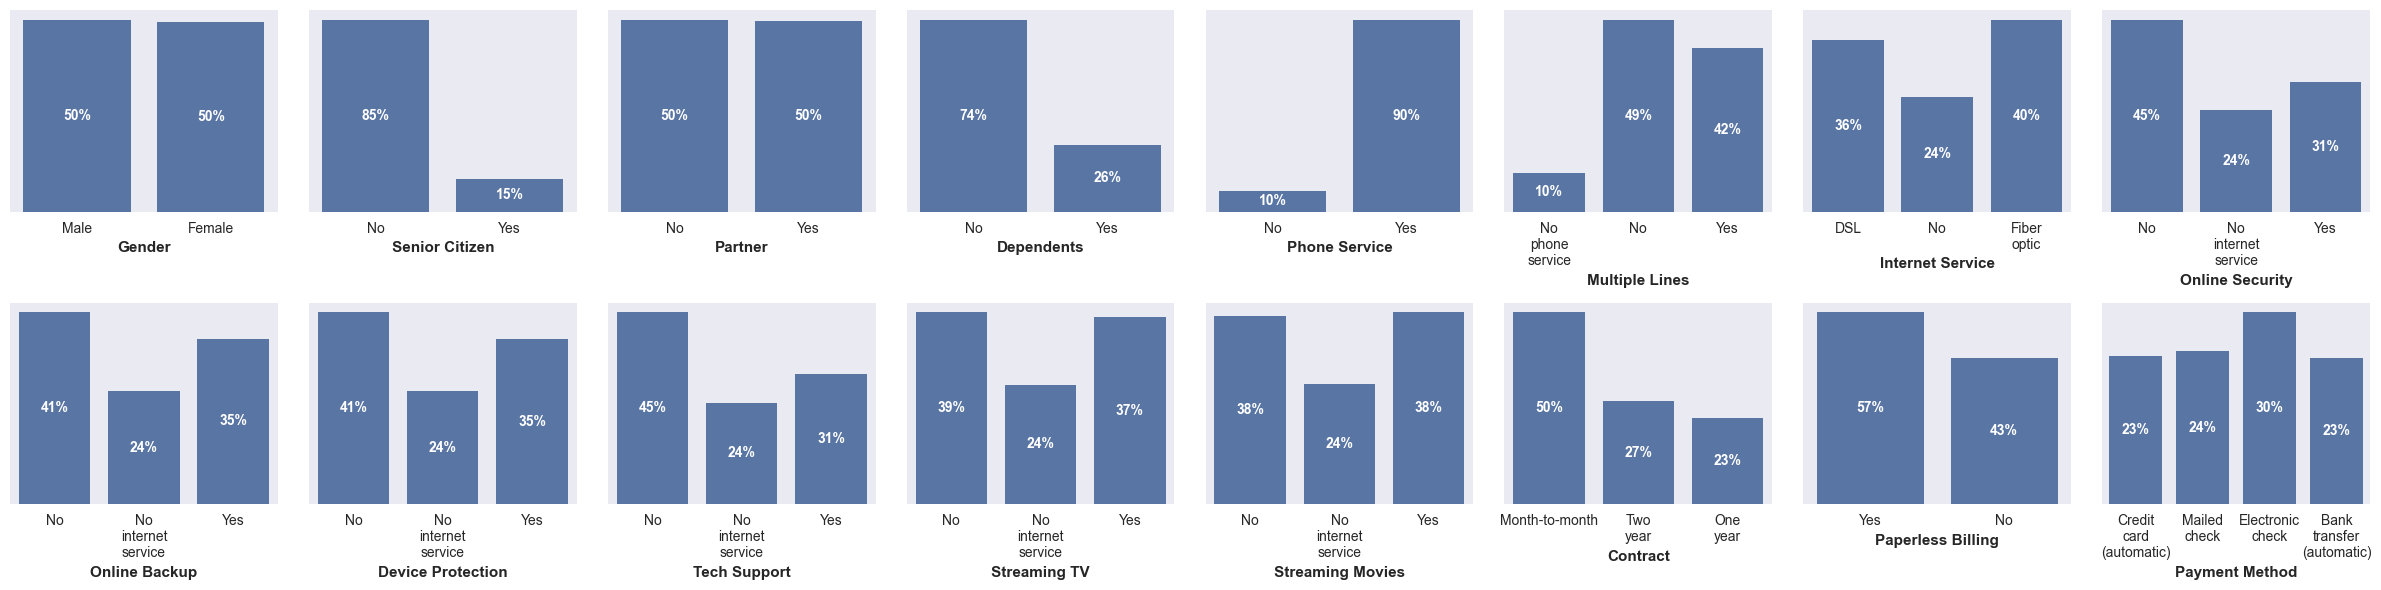

In [ ]:
fig, axes = plt.subplots(2, 8, figsize=(24, 6))

for i, col in enumerate(disc):
    ax = axes[i // 8, i % 8]
    sns.countplot(data=df, x=col, ax=ax)
    
    n = df[col].count()
    for p in ax.patches:
        # Pourcentages
        ax.text(
            p.get_x() + p.get_width() / 2,
            p.get_y() + p.get_height() / 2,
            f"{p.get_height() / n:.0%}",
            ha="center", va="center",
            c="w", weight="bold",
        )
        
        # Formatage des labels sur les axes
        ax.set_xlabel(col, weight="bold")
        ax.set_xticks(ax.get_xticks())
        
        xticklabels = ["\n".join(label.get_text().split()) for label in ax.get_xticklabels()]
        ax.set_xticklabels(xticklabels, rotation=0)
        
        ax.set_yticks([])
        ax.set_ylabel("")

plt.tight_layout()
plt.show()

- Les répartitions hommes/femmes et avec/sans partenaire sont très équilibrées, tandis que les répartitions des personnes agées et des personnes ayant souscrit à un service de téléphone mobile sont déséquilibrées en faveur respecivement des personnes de moins de 65 ans (85%), et des personnes ayant souscrit à un service de téléphone mobile (90%).
- On peut également noter que le quart des clients ne vit pas avec des personnes à charge et la moitié renouvelle mensuellement son abonnement, tandis que l'autre moitié est presque équitablement répartie entre les personnes ayant souscrit à un abonnement annuel et les personnes ayant souscrit à un abonnement sur deux ans.
- La variable `Multiple Lines` est une version détaillée de `Phone Service`, on mesurera l'impact de la suppression de cette dernière de notre jeu de données.
- Aussi, nous remarquons que près du quart des clients de l'échantillon n'est pas abonné à un service Internet. En séparant les données suivant cette variable, ce dernier groupe pourra se passer des 6 variables qui donnent davantage de précisions sur lesdits services : `Online Security`, `Online Backup`, `Device Protection`, `Tech Support`, `Streaming TV` et `Streaming Movies`.

#### **1.2 Séparation avec/sans Internet**

In [13]:
df_internet = df[df["Internet Service"] != "No"]
df_no_internet = df[df["Internet Service"] == "No"]
disc_no_internet = ["Gender", "Senior Citizen", "Partner", "Dependents", "Phone Service", "Multiple Lines", "Contract", "Paperless Billing", "Payment Method"]

- Pour juger de la pertinence de ce split, nous évaluons le lien entre les autres variables (discrètes) et la variable cible à travers un test du chi-2.

In [112]:
from scipy.stats import chi2_contingency

tmp_dfs = {
    "Avec Internet": df_internet,
    "Sans Internet": df_no_internet,
}

for col in disc_no_internet:
    print(f" {col} ".center(25, "-"))
    for df_name, tmp_df in tmp_dfs.items():
        pvalue = chi2_contingency(pd.crosstab(tmp_df[col], tmp_df[target])).pvalue
        lien = " *" if ((df_name != "df") & (pvalue < 0.05)) else ""
        print(f"- {df_name}".ljust(15) + f"  {pvalue:.4f}" + lien)
    print()

--------- Gender --------
- Avec Internet  0.1254
- Sans Internet  0.8092

----- Senior Citizen ----
- Avec Internet  0.0000 *
- Sans Internet  0.7922

-------- Partner --------
- Avec Internet  0.0000 *
- Sans Internet  0.0022 *

------- Dependents ------
- Avec Internet  0.0000 *
- Sans Internet  0.0009 *

----- Phone Service -----
- Avec Internet  0.0008 *
- Sans Internet  1.0000

----- Multiple Lines ----
- Avec Internet  0.0024 *
- Sans Internet  0.0008 *

-------- Contract -------
- Avec Internet  0.0000 *
- Sans Internet  0.0000 *

--- Paperless Billing ---
- Avec Internet  0.0000 *
- Sans Internet  0.2546

----- Payment Method ----
- Avec Internet  0.0000 *
- Sans Internet  0.0022 *



- On observe qu'effectivement, selon que les clients aient souscrit ou non à un service Internet, le soutien à l'hypothèse d'indépendance entre les variables varie de manière significative. Les test ci-dessus suggèrent, avec un seuil fixé à 2%, des liens de dépendance suivants avec la variable cible :

| Colonnes | Avec Internet | Sans Internet |
|-|:-:|:-:|
| Gender            |   |   |
| Senior Citizen    | x |   |
| Partner           | x | x |
| Dependents        | x | x |
| Phone Service     | x |RAS|
| Multiple Lines    | x | x |
| Contract          | x | x |
| Paperless Billing | x |   |
| Payment Method    | x | x |

- Le fait qu'il existe des différences aussi notoires entre ces deux groupes nous conforte dans ce choix de séparer ainsi les données.
- **RAS → Aucune interprétation** : Les clients n'ayant souscrit à aucun service Internet sont forcément des abonnés mobile, on n'a donc qu'une seule modalité dans cette classe (Yes).
- Pour davantage comprendre, analysons visuellement ces relations.

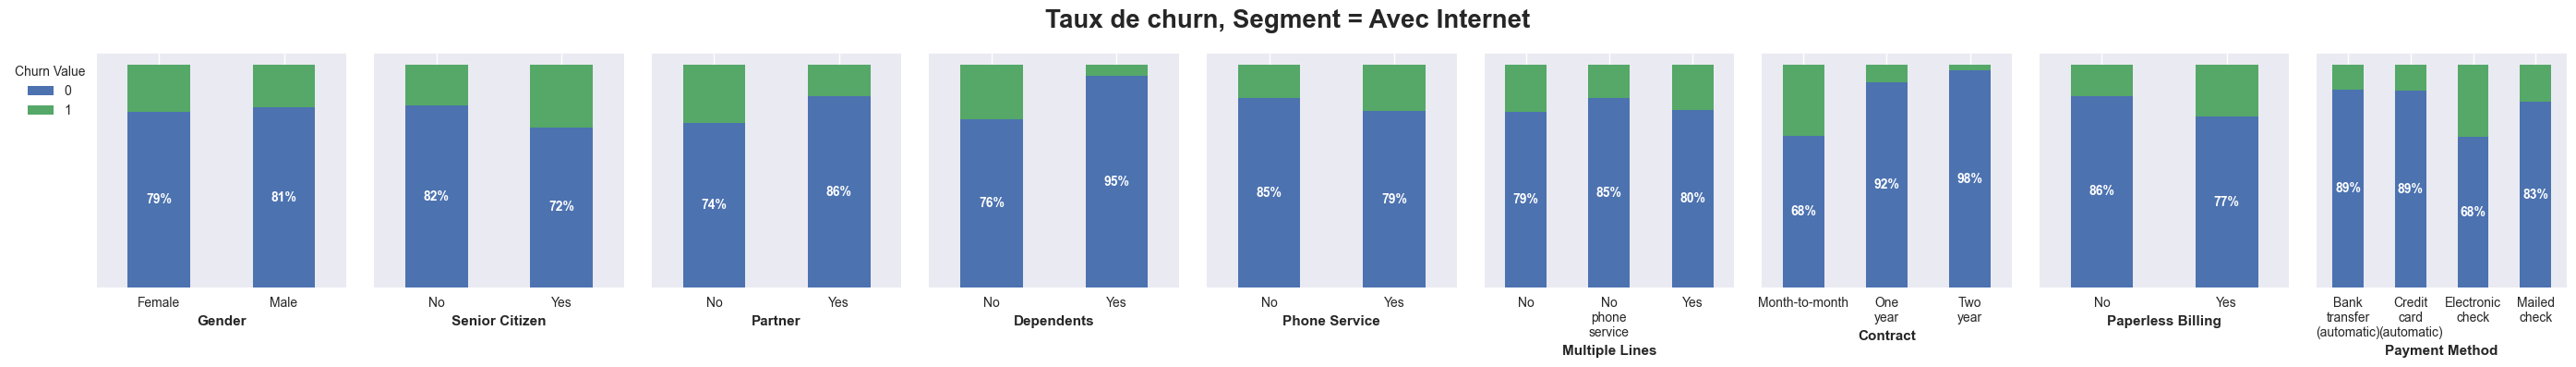

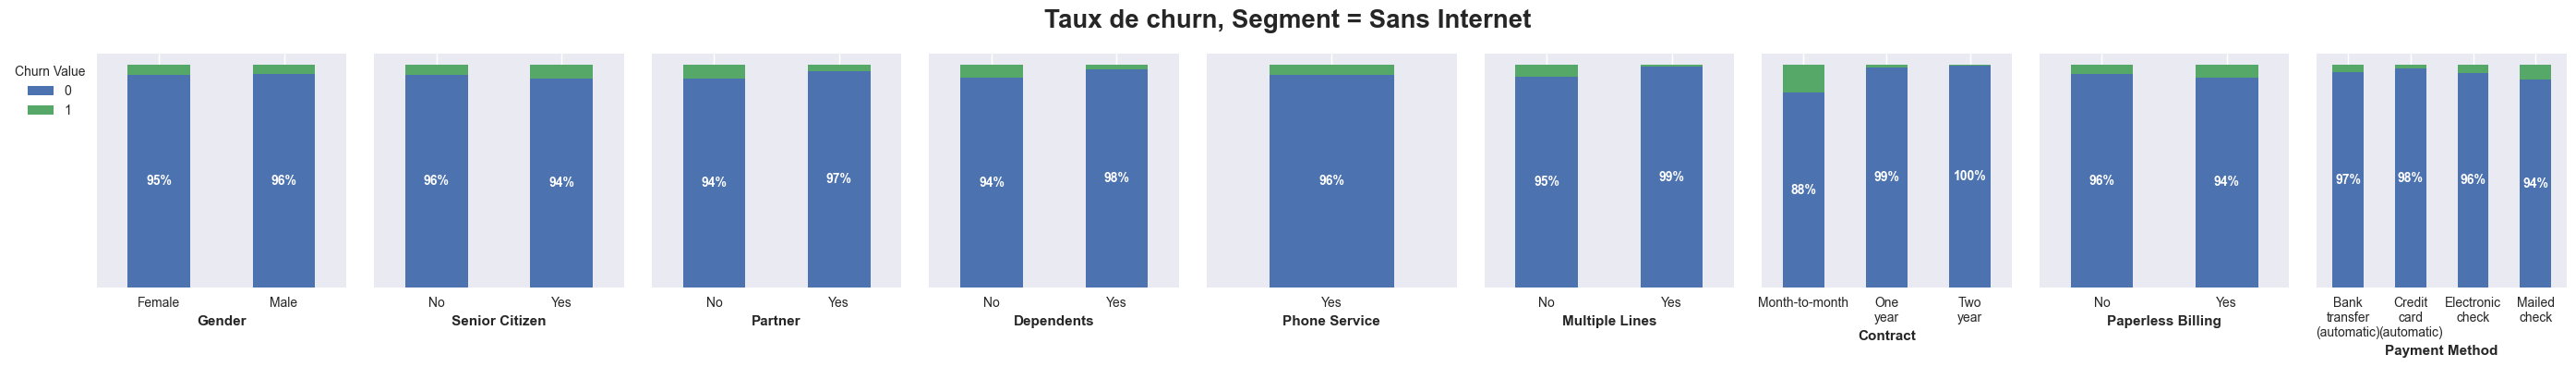

In [192]:
for df_name, tmp_df in tmp_dfs.items():
    fig, axes = plt.subplots(1, 9, figsize=(28, 4))
    
    for i, col in enumerate(disc_no_internet):
        prop_df = pd.crosstab(tmp_df[col], tmp_df[target])
        prop_df = prop_df.div(prop_df.sum(axis=1), axis=0)
        
        ax = prop_df.plot(kind="bar", stacked=True, legend=False, ax=axes[i])
        
        # Pourcentages
        for i, p in enumerate(ax.patches):
            if i < len(ax.patches) / 2:
                ax.text(
                    p.get_x() + p.get_width() / 2,
                    p.get_y() + p.get_height() / 2,
                    f"{p.get_height():.0%}",
                    ha="center", va="center",
                    c="w", weight="bold",
                )
                
        # Formatage des labels sur les axes
        ax.set_xlabel(col, weight="bold")
        ax.set_xticks(ax.get_xticks())
        
        xticklabels = ["\n".join(label.get_text().split()) for label in ax.get_xticklabels()]
        ax.set_xticklabels(xticklabels, rotation=0)
        
        ax.set_yticks([])
        ax.set_ylabel("")

    axes[0].legend(title="Churn Value", bbox_to_anchor=(0, 1))
    
    plt.suptitle(f"Taux de churn, Segment = {df_name}", size=20, weight="bold")
    plt.tight_layout()
    plt.show()

In [140]:
print("Taux de churn :")
print(f"- Avec Internet : {df_internet[target].mean():.2%}")
print(f"- Sans Internet : {df_no_internet[target].mean():.2%}")

Taux de churn :
- Avec Internet : 19.94%
- Sans Internet : 4.44%


- Le premier constat est que la taux de churn est globalement plus élevé chez les clients ayant souscrit à des services Internet (20% vs. 4%).
- Précédemment, nous avons relevé des liens de dépendance entre certaines variables et la cible, nous pouvons dès lors apporter davantage de précisions.
- Pour l'ensemble des clients, nous remarquons que le taux de résiliation est plus élevé lorsque le client :
    - n'a pas de partenaire
    - n'a pas de personnes à charge
    - renouvelle mensuellement son contrat
    - ne possède qu'une seule ligne de téléphone
- Pour les cliens avec Internet, le taux de churn est plus élevé lorsque le client :
    - a plus de 65 ans
    - opte pour une facturation sans papier
    - règle ses factures par chèque électronique
- Pour ceux qui n'utilisent aucun service Internet, le churn est élevé lorsque le client :
    - règle ses factures via un chèque envoyé par courrier (impact relativement faible)
- Ceci nous aide à identifier ces variables, sauf peut-être le mode de règlement pour les clients sans Internet, comme des features importantes pour notre modèle.

In [ ]:
# df.drop(columns="Phone Service", )

In [98]:
# df.loc[df["Contract"] == "Two year"].sort_values("Tenure Months")[["Tenure Months", target]]["Churn Value"].value_counts().plot(kind="bar")

In [97]:
# df.loc[df["Contract"] == "Two year"].sort_values("Tenure Months")[["Tenure Months", target]].loc[df["Churn Value"] == 1]